In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

y = df.iloc[:, 0]   # Year
X = df.iloc[:, 1:]  # Features

DF:(252175, 91)


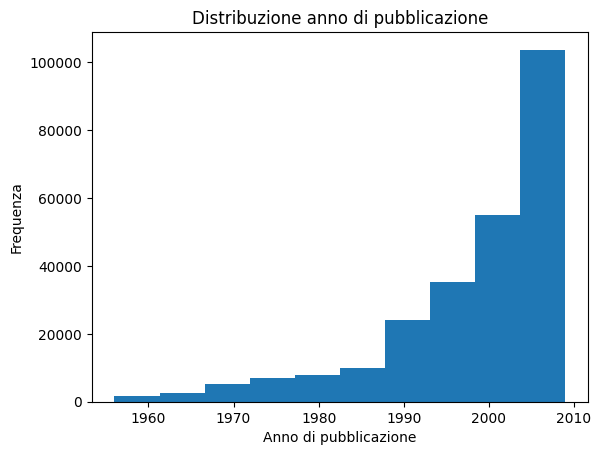

DF DROP:(196925, 91)


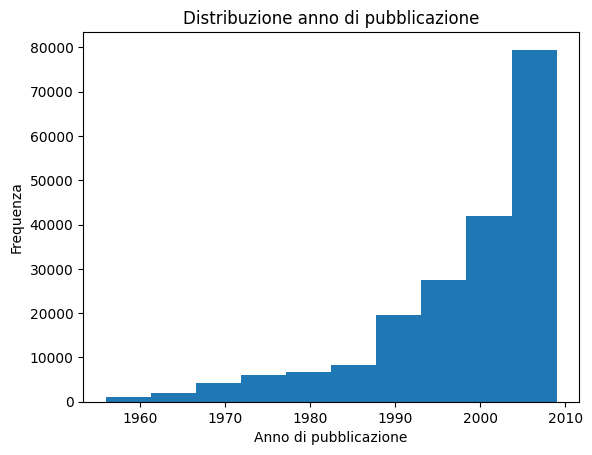

In [3]:

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(X)


from scipy.stats import zscore

# Identify and remove outliers using Z-score
z_scores = zscore(df_normalized)
df_no_outliers =df[(z_scores < 3).all(axis=1)]

print(f'DF:{df.shape}')


y = df_no_outliers.iloc[:, 0]   # Year
X = df_no_outliers.iloc[:, 1:]  # Features

plt.hist(df['Year'])
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione anno di pubblicazione')
plt.show()


print(f'DF DROP:{df_no_outliers.shape}')


plt.hist(y)
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione anno di pubblicazione')
plt.show()




In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suddividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Effettua previsioni sul set di test
predictions = model.predict(X_test)

# Valuta le prestazioni del modello
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 78.67947877093584
R-squared (R²): 0.29128283201948146


In [5]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Effettua previsioni sul set di test
predictions = model.predict(X_test)

# Valuta le prestazioni del modello
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 76.50309523676528
R-squared (R²): 0.31088693208307483


Mean Squared Error (MSE): 96.77968172388097
R-squared (R²): 0.1282425478555438


ValueError: x and y must be the same size

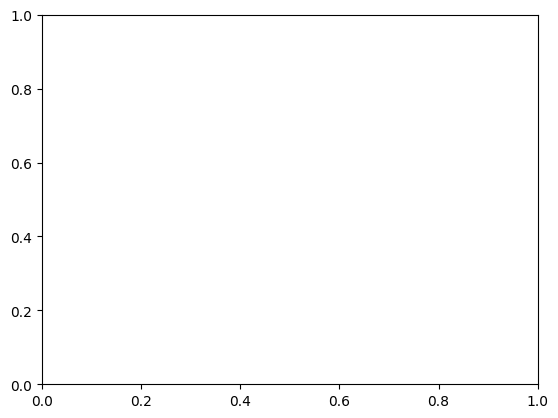

In [6]:
# Importa le librerie necessarie
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

# Effettua la previsione sui dati di test
y_pred = svr.predict(X_test)

# Calcola MSE e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Visualizza i risultati
plt.scatter(X_test, y_test, color='black', label='Dati di test')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Modello SVR')
plt.title('Support Vector Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
